# DSE511. Project 3. Part3. Modeling. 
## Code for Linear Regression modeling.
### Albina Jetybayeva

In this project we are trying to understand the factors contributing to housing prices in California. We hypothesis that the values of the houses will be directly related to the number of total rooms, the number of total bedrooms and median income. And inversely related to the housing median age. We will also be investigating how the price is affected by the location (longitude, latitude and and ocean proximity), the population and the number of households.

In this part, the cleaned, preprocessed dataset will be modeled using the simplest Linear Regerssion as a baseline. The Linear Regression will then be analyzed based on the importance of each feature and then tested with the extraction of only the most contributing features. After that the regression models like Lasso, Ridge and Elastic Net, which help to decrease the model complexity, that is the number of predictors, will be also tested. Each model will be discussed separately and the results will be compared.

These metrics will be used to assess the perfromance of the models:
- mean_squared_error
- mean_absolute_error
- cross_val_score
- Confidence, model.score()
- Coefficients, model.coef_

## Data import and preprocessing

In [1]:
#Importing the base libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib as mpl
mpl.style.use(['ggplot']) #use ggplot style

In [2]:
# Getting the raw data
df = pd.read_csv('housing.csv') # Notice: Raw data is in the Data folder
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
print('There are {} rows and {} columns in train'.format(df.shape[0],df.shape[1]))

There are 20640 rows and 10 columns in train


In [4]:
# As it was dsicussed in Part 1. Explanatory Data Analysis, it might be interesting to add the possibly helpful 
#attributes combinations and study their effect on modeling too

df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


## Handling categorical attributes

As in this dataset there is present one categorical attribute "ocean proximity", for each category the specific number will be assigned. The categories will be changed as follows: NEAR OCEAN = 4; NEAR BAY = 3; <1H OCEAN = 2; INLAND = 1; ISLAND =0. So there will be 5 categories (0-4 numbers) in total.

In [5]:
# Asssigning numerical values to ocean proximity in the gradient order: the lower the number the further away is the house from the ocean
# this gradient is chosen for the better and easier interpretation of models results (feature importances)

df.loc[df['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 4
df.loc[df['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity'] = 3
df.loc[df['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 2
df.loc[df['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 1
df.loc[df['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 0

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,5.329513,0.219892,2.123209


## Data split

Now the data will be splitted in train and test set to avoid the data leakage and bias during the further preprocessing steps, which include cleaning the missing values and feature scaling.

In [6]:
# Splitting the data into training and testing sets.
train_set1, test_set1 = train_test_split(df, test_size=0.2, random_state=1)
print("Training Data", len(train_set1))
print("Testing Data", len(test_set1))

Training Data 16512
Testing Data 4128


## Data cleaning on train and test

Changing the missing values with the median on a train set.

In [7]:
# Observing missing values
missing_values_count = train_set1.isnull().sum()
missing_values_count[:]

total_cells   = np.product(train_set1.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print('Percent of data that is missing:', percent_missing)

imputer = SimpleImputer(strategy = "median")
housing_numerical_attributes = train_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X = imputer.transform(housing_numerical_attributes)

Percent of data that is missing: 0.15187090041741205


Changing the missing values with the median (from a train set) on a test set.

In [8]:
# Observing missing values
missing_values_count = test_set1.isnull().sum()
missing_values_count[:]

total_cells   = np.product(test_set1.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print('Percent of data that is missing:', percent_missing)

imputer = SimpleImputer(strategy = "median")
housing_numerical_attributes1 = test_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X1 = imputer.transform(housing_numerical_attributes1)

Percent of data that is missing: 0.16398330351818724


In [9]:
# Data with replaced NAN values.
# Put back the ocean proximity in train set
train_set = pd.DataFrame(X, columns = housing_numerical_attributes.columns, index = housing_numerical_attributes.index)

train_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,3,5.000000,0.202837,3.117021
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,3,4.900990,0.195286,3.204620
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,1,8.333333,0.200000,3.333333
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,2,3.805981,0.302031,2.580598
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,2,5.894904,0.179363,2.388535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,2,4.055046,0.268100,2.474771
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,2,6.788462,0.149008,2.896154
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,2,4.890785,0.205862,2.645051
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,1,4.991614,0.190676,2.773585


In [10]:
# Data with replaced NAN values.
# Put back the ocean proximity in test set
test_set = pd.DataFrame(X1, columns = housing_numerical_attributes1.columns, index = housing_numerical_attributes1.index)

test_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,2,4.503205,0.238434,1.777244
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,1,4.988584,0.208238,2.609589
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,3,4.480296,0.225948,3.778325
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,3,3.908046,0.285294,2.298851
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,2,5.406360,0.189542,2.512367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-119.70,36.82,25.0,2379.0,540.0,1482.0,484.0,2.3173,68200.0,1,4.915289,0.226986,3.061983
5341,-118.44,34.04,49.0,32.0,7.0,14.0,7.0,2.1875,225000.0,2,4.571429,0.218750,2.000000
16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,350000.0,4,5.000000,0.200000,3.666667
6823,-118.10,34.09,42.0,1460.0,289.0,829.0,273.0,4.8750,227300.0,2,5.347985,0.197945,3.036630


## Feature Scaling

As the attributes have very different ranges, it is recommended ro do the normalization on them, since Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. 

Standardization will be applied, which first subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. The advantage of standardization is that is is much less affected by outliers.

As scaling the target values is generally not required, these will not be scaled. So first the target labels will be dropped and then added after the nscaling.

In [11]:
train_set_without_target = train_set.drop("median_house_value", axis=1) # drop labels for training set 
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,3,5.000000,0.202837,3.117021
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,3,4.900990,0.195286,3.204620
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,1,8.333333,0.200000,3.333333
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,2,3.805981,0.302031,2.580598
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,2,5.894904,0.179363,2.388535
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,2,4.055046,0.268100,2.474771
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,2,6.788462,0.149008,2.896154
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,2,4.890785,0.205862,2.645051
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,1,4.991614,0.190676,2.773585


In [12]:
test_set_without_target = test_set.drop("median_house_value", axis=1) # drop labels for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,2,4.503205,0.238434,1.777244
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,1,4.988584,0.208238,2.609589
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,3,4.480296,0.225948,3.778325
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,3,3.908046,0.285294,2.298851
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,2,5.406360,0.189542,2.512367
...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-119.70,36.82,25.0,2379.0,540.0,1482.0,484.0,2.3173,1,4.915289,0.226986,3.061983
5341,-118.44,34.04,49.0,32.0,7.0,14.0,7.0,2.1875,2,4.571429,0.218750,2.000000
16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,4,5.000000,0.200000,3.666667
6823,-118.10,34.09,42.0,1460.0,289.0,829.0,273.0,4.8750,2,5.347985,0.197945,3.036630


In [13]:
# Creating pandas series full of zeros to store the standard deviation and the mean from the training set.
std_dev_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")
mean_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")

# Getting the values for the mean and standard deviation from the training dataset.
for col in train_set_without_target.columns:
    std_dev_tr[col]= train_set_without_target[col].std()
    mean_tr[col]= train_set_without_target[col].mean()
    # Changing the training data so it is normalized with the mean and standard deviation from the training set.
    train_set_without_target[col]=(train_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

for col in test_set_without_target.columns:
    # Changing the testing data so it is normalized with the mean and standard deviation from the training set.
    test_set_without_target[col]=(test_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

In [14]:
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.05655,-0.625594,1.524846,-0.044352
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.05655,0.173618,-0.579347,-0.060913
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.843946,-0.876050,-0.922011,-0.400469,-0.152821,-0.308125,-0.168899,-1.106929,-0.05655,-0.530303,0.942798,-0.053477
17289,-0.027751,-0.567218,1.064316,-0.401848,-0.656476,-0.598223,-0.629102,2.476576,-0.05655,0.515489,-1.100022,-0.017143
5192,0.654663,-0.796502,1.064316,-0.554392,-0.580093,-0.578646,-0.542814,-1.450398,-0.05655,-0.210553,-0.124792,-0.038795
12172,1.202587,-0.890087,-1.478182,-0.118815,-0.200561,-0.090996,-0.061692,-0.657623,-1.087176,-0.171977,-0.385278,-0.027712


In [15]:
train_set_without_target.insert(12,"median_house_value",train_set["median_house_value"]) #Put back the target values for train set
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901,255600.0
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455,114600.0
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553,137500.0
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.05655,-0.625594,1.524846,-0.044352,118800.0
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.05655,0.173618,-0.579347,-0.060913,422700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.843946,-0.876050,-0.922011,-0.400469,-0.152821,-0.308125,-0.168899,-1.106929,-0.05655,-0.530303,0.942798,-0.053477,205300.0
17289,-0.027751,-0.567218,1.064316,-0.401848,-0.656476,-0.598223,-0.629102,2.476576,-0.05655,0.515489,-1.100022,-0.017143,500001.0
5192,0.654663,-0.796502,1.064316,-0.554392,-0.580093,-0.578646,-0.542814,-1.450398,-0.05655,-0.210553,-0.124792,-0.038795,104800.0
12172,1.202587,-0.890087,-1.478182,-0.118815,-0.200561,-0.090996,-0.061692,-0.657623,-1.087176,-0.171977,-0.385278,-0.027712,140700.0


In [16]:
train=train_set_without_target
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901,255600.0
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455,114600.0
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553,137500.0
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.05655,-0.625594,1.524846,-0.044352,118800.0
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.05655,0.173618,-0.579347,-0.060913,422700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.843946,-0.876050,-0.922011,-0.400469,-0.152821,-0.308125,-0.168899,-1.106929,-0.05655,-0.530303,0.942798,-0.053477,205300.0
17289,-0.027751,-0.567218,1.064316,-0.401848,-0.656476,-0.598223,-0.629102,2.476576,-0.05655,0.515489,-1.100022,-0.017143,500001.0
5192,0.654663,-0.796502,1.064316,-0.554392,-0.580093,-0.578646,-0.542814,-1.450398,-0.05655,-0.210553,-0.124792,-0.038795,104800.0
12172,1.202587,-0.890087,-1.478182,-0.118815,-0.200561,-0.090996,-0.061692,-0.657623,-1.087176,-0.171977,-0.385278,-0.027712,140700.0


In [17]:
test_set_without_target.insert(12,"median_house_value",test_set["median_house_value"]) #Put back the target values for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
4712,0.604852,-0.735672,0.825957,0.078298,0.315029,-0.281429,0.322682,-0.331018,-0.05655,-0.358840,0.433935,-0.113623,355000.0
2151,-0.102468,0.537089,0.667051,-0.208871,-0.198174,-0.251173,-0.163669,-1.003259,-1.087176,-0.173136,-0.084033,-0.041853,70700.0
15927,-1.417486,0.981619,1.382128,-0.377037,-0.303201,0.096767,-0.247342,0.072453,0.974077,-0.367605,0.219760,0.058923,229400.0
82,-1.347750,1.019053,1.858847,-1.056592,-1.052717,-1.090322,-1.081461,-1.245173,0.974077,-0.586545,1.237744,-0.068646,112500.0
8161,0.719418,-0.847974,0.667051,-0.509823,-0.592027,-0.635598,-0.568962,0.689026,-0.05655,-0.013297,-0.404725,-0.050236,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-0.062619,0.555806,-0.286386,-0.119733,0.004721,0.050494,-0.043389,-0.824097,-1.087176,-0.201178,0.237562,-0.002844,68200.0
5341,0.565003,-0.745030,1.620488,-1.198109,-1.267546,-1.255839,-1.290644,-0.892717,-0.05655,-0.332738,0.096284,-0.094415,225000.0
16888,-1.392580,0.920789,-0.206933,-1.205920,-1.277094,-1.258508,-1.301103,0.619508,2.004703,-0.168768,-0.225343,0.049295,350000.0
6823,0.734361,-0.721634,1.064316,-0.541986,-0.594414,-0.530593,-0.595110,0.528050,-0.05655,-0.035631,-0.260590,-0.005030,227300.0


In [18]:
test=test_set_without_target
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
4712,0.604852,-0.735672,0.825957,0.078298,0.315029,-0.281429,0.322682,-0.331018,-0.05655,-0.358840,0.433935,-0.113623,355000.0
2151,-0.102468,0.537089,0.667051,-0.208871,-0.198174,-0.251173,-0.163669,-1.003259,-1.087176,-0.173136,-0.084033,-0.041853,70700.0
15927,-1.417486,0.981619,1.382128,-0.377037,-0.303201,0.096767,-0.247342,0.072453,0.974077,-0.367605,0.219760,0.058923,229400.0
82,-1.347750,1.019053,1.858847,-1.056592,-1.052717,-1.090322,-1.081461,-1.245173,0.974077,-0.586545,1.237744,-0.068646,112500.0
8161,0.719418,-0.847974,0.667051,-0.509823,-0.592027,-0.635598,-0.568962,0.689026,-0.05655,-0.013297,-0.404725,-0.050236,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-0.062619,0.555806,-0.286386,-0.119733,0.004721,0.050494,-0.043389,-0.824097,-1.087176,-0.201178,0.237562,-0.002844,68200.0
5341,0.565003,-0.745030,1.620488,-1.198109,-1.267546,-1.255839,-1.290644,-0.892717,-0.05655,-0.332738,0.096284,-0.094415,225000.0
16888,-1.392580,0.920789,-0.206933,-1.205920,-1.277094,-1.258508,-1.301103,0.619508,2.004703,-0.168768,-0.225343,0.049295,350000.0
6823,0.734361,-0.721634,1.064316,-0.541986,-0.594414,-0.530593,-0.595110,0.528050,-0.05655,-0.035631,-0.260590,-0.005030,227300.0


## Modeling Linear Regression

In [19]:
# First, we will split between features and target value (labels) for train set

housing = train.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train["median_house_value"].copy()

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.05655,-0.625594,1.524846,-0.044352
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.05655,0.173618,-0.579347,-0.060913
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.843946,-0.876050,-0.922011,-0.400469,-0.152821,-0.308125,-0.168899,-1.106929,-0.05655,-0.530303,0.942798,-0.053477
17289,-0.027751,-0.567218,1.064316,-0.401848,-0.656476,-0.598223,-0.629102,2.476576,-0.05655,0.515489,-1.100022,-0.017143
5192,0.654663,-0.796502,1.064316,-0.554392,-0.580093,-0.578646,-0.542814,-1.450398,-0.05655,-0.210553,-0.124792,-0.038795
12172,1.202587,-0.890087,-1.478182,-0.118815,-0.200561,-0.090996,-0.061692,-0.657623,-1.087176,-0.171977,-0.385278,-0.027712


In [20]:
housing_labels

15961    255600.0
1771     114600.0
16414    137500.0
5056     118800.0
8589     422700.0
           ...   
10955    205300.0
17289    500001.0
5192     104800.0
12172    140700.0
235      126000.0
Name: median_house_value, Length: 16512, dtype: float64

In [21]:
# Second, we will split between features and target value (labels) for test set

housing_t = test.drop("median_house_value", axis=1) # drop labels for test set
housing_labels_t = test["median_house_value"].copy()

housing_t

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4712,0.604852,-0.735672,0.825957,0.078298,0.315029,-0.281429,0.322682,-0.331018,-0.05655,-0.358840,0.433935,-0.113623
2151,-0.102468,0.537089,0.667051,-0.208871,-0.198174,-0.251173,-0.163669,-1.003259,-1.087176,-0.173136,-0.084033,-0.041853
15927,-1.417486,0.981619,1.382128,-0.377037,-0.303201,0.096767,-0.247342,0.072453,0.974077,-0.367605,0.219760,0.058923
82,-1.347750,1.019053,1.858847,-1.056592,-1.052717,-1.090322,-1.081461,-1.245173,0.974077,-0.586545,1.237744,-0.068646
8161,0.719418,-0.847974,0.667051,-0.509823,-0.592027,-0.635598,-0.568962,0.689026,-0.05655,-0.013297,-0.404725,-0.050236
...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-0.062619,0.555806,-0.286386,-0.119733,0.004721,0.050494,-0.043389,-0.824097,-1.087176,-0.201178,0.237562,-0.002844
5341,0.565003,-0.745030,1.620488,-1.198109,-1.267546,-1.255839,-1.290644,-0.892717,-0.05655,-0.332738,0.096284,-0.094415
16888,-1.392580,0.920789,-0.206933,-1.205920,-1.277094,-1.258508,-1.301103,0.619508,2.004703,-0.168768,-0.225343,0.049295
6823,0.734361,-0.721634,1.064316,-0.541986,-0.594414,-0.530593,-0.595110,0.528050,-0.05655,-0.035631,-0.260590,-0.005030


In [22]:
housing_labels_t

4712     355000.0
2151      70700.0
15927    229400.0
82       112500.0
8161     225400.0
           ...   
2319      68200.0
5341     225000.0
16888    350000.0
6823     227300.0
11878    141700.0
Name: median_house_value, Length: 4128, dtype: float64

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [23]:
%%time

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels)


Wall time: 20.9 ms


LinearRegression()

In [24]:
%%time
housing_pred = lin_reg.predict(housing_t)

Wall time: 5.98 ms


First metrics that will be used to asses the performance of the model will be the mean_squared_error. This function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss (https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). In statistics, the mean squared error (MSE)[1] or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. 

In [25]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_labels_t, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68949.2311841758

It is clear that that the error is quite large. Considering that the price ranges between USD 120,000 and USD 265,000, the typical prediction error of USD 68,628 is too big. This is an example of a model underfitting the training data. When this happens it might be a result of the features not providing enough information to make good predictions, or that the model is not powerful
enough. The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. Linear Regression model is not regularized, so this rules out the last option. However, playing with features (removing or adding some) can be done later.

another metrics that can be used is the mean absolute error. In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. It is thus an arithmetic average of the absolute errors |e(i)|=|y(i)-x(i)|, where y(i) is the prediction and x(i) is the true value. 

In [26]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels_t, housing_pred)
lin_mae

49591.09036984259

As it can be seen, MAE is also quite high for this linear regression model.

Another helpful metrics used for the model evaluation, especially for trees models, is the cross validation score. This function randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores. Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value). Cross-validation allows to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation).

In [27]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [28]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [69756.31857545 65555.0818944  71195.40704454 69881.17384993
 69129.50776531 68184.98361643 64357.65053553 67707.2551651
 68529.1204393  70420.48911575]
Mean: 68471.69880017315
Standard deviation: 2034.4010180712396


Another metrics for the model performance is the model score. The coefficient of determination R^2 is defined as (1-u/v), where u is the residual sum of squares ((y_true - y_pred)** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

In [29]:
lr_confidence = lin_reg.score(housing_t, housing_labels_t)
print("lr confidence: ", lr_confidence)

lr confidence:  0.6375673045044787


For this model the score is 0.63, which is not high as expected from the other previous metrics.

Text(0, 0.5, 'Predicted')

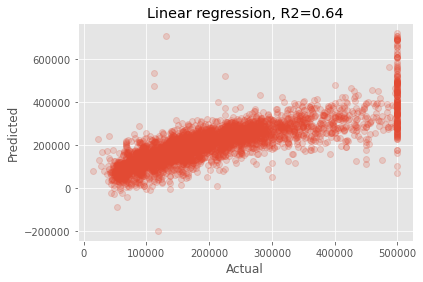

In [30]:
#Visualize the predicted and actual prices
from sklearn.metrics import r2_score

housing_pred_lr = lin_reg.predict(housing_t)
plt.figure()
plt.errorbar(housing_labels_t, housing_pred_lr, fmt='o', alpha=0.2)
plt.title('Linear regression, R2=%.2f' % r2_score(housing_labels_t, housing_pred_lr))
plt.xlabel('Actual')
plt.ylabel('Predicted')

As it was seen the values of prices were capped with USD 500,000 median_house_value. The capped house value may be a problem for a precise modeling since it is the target attribute (labels). The Machine Learning algorithms may learn that prices never go beyond that limit. To check how the model will perform without these capped prices those values will be removed from the training set (and also from the test set, since the system should not be evaluated poorly if it predicts values beyond USD 500,000) and tested in a separate code.

To evaluate the features importance of linear regression model, the coefficients of the model will be extracted. Regression coefficients are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response.The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable. A positive sign indicates that as the predictor variable increases, the response variable also increases.
A negative sign indicates that as the predictor variable increases, the response variable decreases. The coefficient value represents the mean change in the response given a one unit change in the predictor. So the larger the coefficient can be interpreted as more weight and siginifcance is for this feature.

Feature: 0, Score: -71322.93525
Feature: 1, Score: -75020.47402
Feature: 2, Score: 14318.96525
Feature: 3, Score: 2833.79785
Feature: 4, Score: 4560.77258
Feature: 5, Score: -44568.54231
Feature: 6, Score: 42075.53194
Feature: 7, Score: 80762.65762
Feature: 8, Score: 7740.51183
Feature: 9, Score: 7656.70375
Feature: 10, Score: 17705.53367
Feature: 11, Score: 688.73252


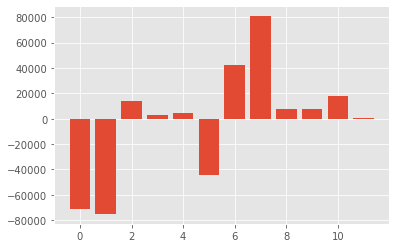

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) #use ggplot style

importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [32]:
#To get the exact names of features create the table
coef_table = pd.DataFrame(list(housing.columns)).copy()
coef_table.columns = ['Features']
coef_table.insert(len(coef_table.columns),"Coefs",lin_reg.coef_.transpose())
coef_table

,Features,Coefs
0,longitude,-71322.935254
1,latitude,-75020.474019
2,housing_median_age,14318.965251
3,total_rooms,2833.797849
4,total_bedrooms,4560.772580
5,population,-44568.542311
6,households,42075.531936
7,median_income,80762.657623
8,ocean_proximity,7740.511828
9,rooms_per_household,7656.703754


In [33]:
coef_table_sorted=coef_table.sort_values(by='Coefs')

<Figure size 432x288 with 0 Axes>

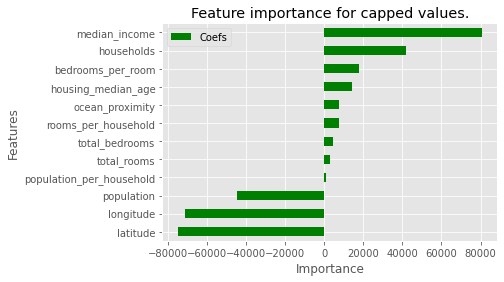

In [34]:
from matplotlib.pyplot import figure
figure()
# Creating a horizontal graph with the values from the pandas Series.

coef_table_sorted.plot.barh(x='Features', y='Coefs', color="green")
plt.title("Feature importance for capped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

1) It can be seen that among all the features the income has the highest positive signifcance, followed by the households snd bedrooms per room numbers. These are expected, as higher salaries correlate with buying more expensive houses, while larger households and larger amount of bedrooms per rooms imply the larger properties and thus, higher prices as well.

2) Interestingly, the strong negative coefficients are noticed for the longtitude, lattitude and the price. By ananlyzing and visualizing that, it can be seen that the more north and the east the direction on the map the cheaper the houses are. By looking at the map of Califronia from part1 explanatory data analysis, it can be seen that this direction represents exactly the moving more into continental part of the state and away from teh coastal line. So this interetsing finsing highlights that.

3) Another strong negative realtionship was observed for the population, which can be explained by the fact that the lower the population in the area the higher the price, as it can be considered a more private area.

4) Interestingly, the small positive correlation was found for the house age and price, which contradicts with the expected result. As the newer houses were predicted to be more expensive. Most probably, those houses which are older, are placed in the favorbale and popular locations, and location as we observed plays an important role in defining the house price and this effect overpasses the age factor.

5) Although the location is important it might be difficult to interpret the ocean proximity in this dataset as they are assigned as different numbers. One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), this was done for ocean proximity as well by asssigning numerical values to ocean proximity in the gradient order: the lower the number the further away is the house from the ocean. This gradient is chosen for the better and easier interpretation of models results (feature importances). Still it can be seen that the small positive coefficient indicates that with closer proximity to ocean increases the housing prices. For the future work and easier representation what can be done is to use a common solution to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on.This can be studied further.

## Extract only important features and run again LinReg

To evaluate the performance of the Linear Regression model from the different perspective the only important features observed above will be considered in the next part. So that "total_rooms", "total_bedrooms", "ocean_proximity", "population_per_household" will be dropped.

In [35]:
housing_new = housing.drop(["total_rooms", "total_bedrooms", "ocean_proximity", "population_per_household"], axis=1) # drop labels for training set
housing_new

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room
15961,-1.422467,0.972261,1.858847,-0.486099,-0.571577,-0.362315,-0.168768,-0.176681
1771,-1.382618,1.084563,1.064316,-0.404231,-0.516666,-0.141019,-0.206649,-0.306201
16414,-0.829713,1.061167,-1.001464,-1.250499,-1.293259,-0.661429,1.106550,-0.225343
5056,0.609833,-0.754389,0.428691,1.880071,2.275932,-1.248609,-0.625594,1.524846
8589,0.589909,-0.815219,0.746504,-0.600893,-0.487903,1.828865,0.173618,-0.579347
...,...,...,...,...,...,...,...,...
10955,0.843946,-0.876050,-0.922011,-0.308125,-0.168899,-1.106929,-0.530303,0.942798
17289,-0.027751,-0.567218,1.064316,-0.598223,-0.629102,2.476576,0.515489,-1.100022
5192,0.654663,-0.796502,1.064316,-0.578646,-0.542814,-1.450398,-0.210553,-0.124792
12172,1.202587,-0.890087,-1.478182,-0.090996,-0.061692,-0.657623,-0.171977,-0.385278


In [36]:
housing_t_new = housing_t.drop(["total_rooms", "total_bedrooms", "ocean_proximity", "population_per_household"], axis=1) # drop labels for training set
housing_t_new

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room
4712,0.604852,-0.735672,0.825957,-0.281429,0.322682,-0.331018,-0.358840,0.433935
2151,-0.102468,0.537089,0.667051,-0.251173,-0.163669,-1.003259,-0.173136,-0.084033
15927,-1.417486,0.981619,1.382128,0.096767,-0.247342,0.072453,-0.367605,0.219760
82,-1.347750,1.019053,1.858847,-1.090322,-1.081461,-1.245173,-0.586545,1.237744
8161,0.719418,-0.847974,0.667051,-0.635598,-0.568962,0.689026,-0.013297,-0.404725
...,...,...,...,...,...,...,...,...
2319,-0.062619,0.555806,-0.286386,0.050494,-0.043389,-0.824097,-0.201178,0.237562
5341,0.565003,-0.745030,1.620488,-1.255839,-1.290644,-0.892717,-0.332738,0.096284
16888,-1.392580,0.920789,-0.206933,-1.258508,-1.301103,0.619508,-0.168768,-0.225343
6823,0.734361,-0.721634,1.064316,-0.530593,-0.595110,0.528050,-0.035631,-0.260590


In [37]:
%%time
lin_reg1 = LinearRegression()
lin_reg1.fit(housing_new, housing_labels)


Wall time: 4.99 ms


LinearRegression()

In [38]:
%%time
housing_pred1 = lin_reg1.predict(housing_t_new)

Wall time: 1.99 ms


In [39]:
lin_mse1 = mean_squared_error(housing_labels_t, housing_pred1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

69083.19708252663

Evaluating the RMSE and comparing with the previous value, it can be seen that the difference is not large. It is very slightly smaller, but this is not very impactful. So other strategies should be applied to reduce RMSE.

In [40]:
lin_mae1 = mean_absolute_error(housing_labels_t, housing_pred1)
lin_mae1

49841.234893153225

Same for the MAE, validation score, confidence score values, where the difference is insignificant.

In [41]:
lin_scores1 = cross_val_score(lin_reg1, housing_new, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores1 = np.sqrt(-lin_scores1)
display_scores(lin_rmse_scores1)

Scores: [69999.36681881 65695.97138979 71511.89211471 69709.49051574
 69389.94872639 68385.72262861 64434.1618469  67763.98362946
 69024.68338162 70766.14211856]
Mean: 68668.13631705762
Standard deviation: 2089.278854102212


In [42]:
lr_confidence1 = lin_reg1.score(housing_t_new, housing_labels_t)
print("lr confidence: ", lr_confidence1)

lr confidence:  0.6361575486656652


Feature: 0, Score: -83646.68552
Feature: 1, Score: -87723.94207
Feature: 2, Score: 14615.01994
Feature: 3, Score: -45511.10017
Feature: 4, Score: 50043.44553
Feature: 5, Score: 80987.34293
Feature: 6, Score: 8929.09983
Feature: 7, Score: 18009.80300


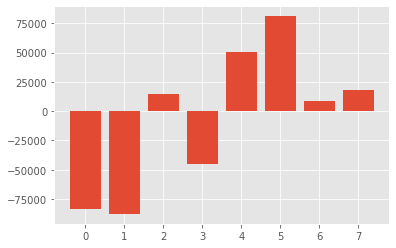

In [43]:
importance_lr1 = lin_reg1.coef_
# summarize feature importance
for i,v in enumerate(importance_lr1):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_lr1))], importance_lr1)
plt.show()

In [44]:
coef_table1 = pd.DataFrame(list(housing_new.columns)).copy()
coef_table1.columns = ['Features']
coef_table1.insert(len(coef_table1.columns),"Coefs",lin_reg1.coef_.transpose())
coef_table1

,Features,Coefs
0,longitude,-83646.685523
1,latitude,-87723.942070
2,housing_median_age,14615.019936
3,population,-45511.100171
4,households,50043.445529
5,median_income,80987.342926
6,rooms_per_household,8929.099829
7,bedrooms_per_room,18009.803004


In [45]:
coef_table_sorted1=coef_table1.sort_values(by='Coefs')

<Figure size 432x288 with 0 Axes>

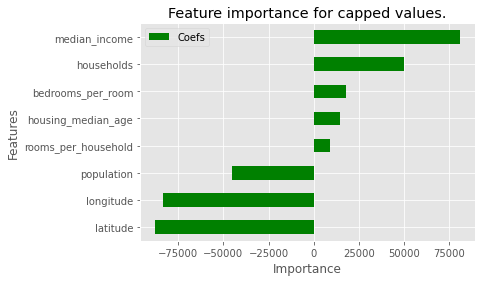

In [46]:
figure()
# Creating a horizontal graph with the values from the pandas Series.

coef_table_sorted1.plot.barh(x='Features', y='Coefs', color="green")
plt.title("Feature importance for capped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Generally, the coefficients stayed the same as in the previous case, and the perfromance of the model was not improved significantly.

## Lasso, Ridge or Elastic Net

As the results were not improved much, the other related regression models woul be tested like Lasso, Ridge and Elastic Net and their optimized results will be compared with the Linear Regression.

## Ridge

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)). In Ridge Regression, the OLS loss function is augmented in such a way that we not only minimize the sum of squared residuals but also penalize the size of parameter estimates, in order to shrink them towards zero.

L2 regularization (Ridge) - better for dense data.

In [47]:
%%time

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(housing, housing_labels)


Wall time: 18 ms


Ridge(alpha=1)

In [48]:
%%time
housing_pred_r = ridge.predict(housing_t)

Wall time: 6.98 ms


Ridge has an alpha parameter that can be optimized and grisdearch will be used for that. Alpha represents the regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. 

In [49]:
from sklearn.model_selection import GridSearchCV

#Grid Search
clf = Ridge()
grid_values = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring='neg_mean_squared_error',cv=5)
grid_clf_acc.fit(housing, housing_labels)

print(grid_clf_acc.best_estimator_)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(housing_t)

Ridge(alpha=10)


It can be seen that the results are similar to Linear Regression model for MSE (alpha=1).

In [50]:
lin_mse_r = mean_squared_error(housing_labels_t, housing_pred_r)
lin_rmse_r = np.sqrt(lin_mse_r)
lin_rmse_r

68949.4263510749

For optimized alpha=10, RMSE also doesnt show much improvement

In [51]:
lin_mse_r1 = mean_squared_error(housing_labels_t, y_pred_acc) #alpha=10
lin_rmse_r1 = np.sqrt(lin_mse_r1)
lin_rmse_r1

68951.81268797912

The case is the same for MAE

In [52]:
lin_mae_r = mean_absolute_error(housing_labels_t, housing_pred_r)
lin_mae_r

49590.450245190164

In [53]:
lin_mae_r1 = mean_absolute_error(housing_labels_t, y_pred_acc) #alpha=10
lin_mae_r1

49586.11152463357

Looking at the other metrics, again no large improvements are noticed compared to baseline Linear Regression.

In [54]:
lin_scores_r = cross_val_score(ridge, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores_r = np.sqrt(-lin_scores_r)
display_scores(lin_rmse_scores_r)

Scores: [69757.95907589 65556.9982813  71187.15775323 69880.36100374
 69128.76869419 68185.85358953 64359.47514613 67709.37630203
 68528.60413687 70417.30520712]
Mean: 68471.1859190033
Standard deviation: 2032.278974964864


In [55]:
lr_confidence_r = ridge.score(housing_t, housing_labels_t)
print("lr confidence: ", lr_confidence_r)

lr confidence:  0.6375652527059539


Feature: 0, Score: -71209.39025
Feature: 1, Score: -74902.95024
Feature: 2, Score: 14323.86587
Feature: 3, Score: 2824.21225
Feature: 4, Score: 4612.73286
Feature: 5, Score: -44529.95514
Feature: 6, Score: 41998.39582
Feature: 7, Score: 80769.50799
Feature: 8, Score: 7769.13596
Feature: 9, Score: 7644.04979
Feature: 10, Score: 17700.93830
Feature: 11, Score: 684.41160


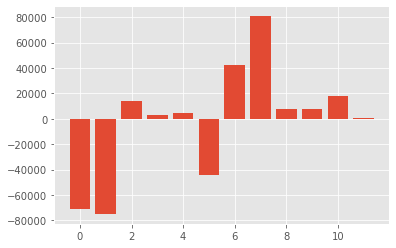

In [56]:
importance_r1 = ridge.coef_
# summarize feature importance
for i,v in enumerate(importance_r1):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_r1))], importance_r1)
plt.show()

In [57]:
coef_table_r = pd.DataFrame(list(housing.columns)).copy()
coef_table_r.columns = ['Features']
coef_table_r.insert(len(coef_table_r.columns),"Coefs",ridge.coef_.transpose())
coef_table_r

,Features,Coefs
0,longitude,-71209.390250
1,latitude,-74902.950240
2,housing_median_age,14323.865871
3,total_rooms,2824.212252
4,total_bedrooms,4612.732858
5,population,-44529.955136
6,households,41998.395822
7,median_income,80769.507985
8,ocean_proximity,7769.135960
9,rooms_per_household,7644.049788


In [58]:
coef_table_sorted_r=coef_table_r.sort_values(by='Coefs')

<Figure size 432x288 with 0 Axes>

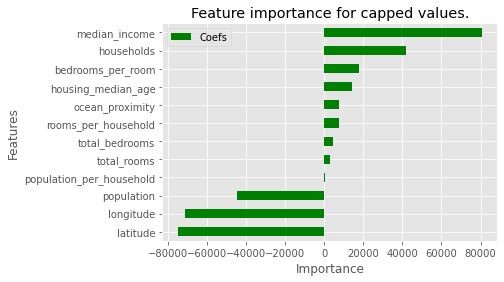

In [59]:
figure()
# Creating a horizontal graph with the values from the pandas Series.

coef_table_sorted_r.plot.barh(x='Features', y='Coefs', color="green")
plt.title("Feature importance for capped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Generally, the coefficients stayed the same as in the Linear Regression case, and the perfromance of the model was not improved significantly.

## Lasso

Lasso, or Least Absolute Shrinkage and Selection Operator, is quite similar conceptually to ridge regression. It also adds a penalty for non-zero coefficients, but unlike ridge regression which penalizes sum of squared coefficients (the so-called L2 penalty), lasso penalizes the sum of their absolute values (L1 penalty). As a result, for high values of λ, many coefficients are exactly zeroed under lasso, which is never the case in ridge regression.

Linear Model trained with L1 prior as regularizer (aka the Lasso).

L1 regularization (Lasso) - better for sparse data.

In [60]:
%%time
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=1)
lasso.fit(housing, housing_labels)


Wall time: 57.8 ms


Lasso(alpha=1)

In [61]:
%%time
housing_pred_l = lasso.predict(housing_t)

Wall time: 5.98 ms


Similarly to Ridge, Lasso also has an alpha parameter that can be optimized and grisdearch will be used for that. Alpha is a constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. 

In [62]:
from sklearn.model_selection import GridSearchCV

#Grid Search
clf2 = linear_model.Lasso()
grid_values2 = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
grid_clf_acc2 = GridSearchCV(clf2, param_grid = grid_values2, scoring='neg_mean_squared_error',cv=5)
grid_clf_acc2.fit(housing, housing_labels)

print(grid_clf_acc2.best_estimator_)

#Predict values based on new parameters
y_pred_acc2 = grid_clf_acc2.predict(housing_t)

Lasso(alpha=100)


Again, checking all the same metrics for Lasso, no large differences are observed for the baseline Linear Regression and Lasso for both alpha=1 and optimized alpha=100.

In [63]:
lin_mse_l = mean_squared_error(housing_labels_t, housing_pred_l)
lin_rmse_l = np.sqrt(lin_mse_l)
lin_rmse_l

68949.27356140257

In [64]:
lin_mse_l2 = mean_squared_error(housing_labels_t, y_pred_acc2)
lin_rmse_l2 = np.sqrt(lin_mse_l2)
lin_rmse_l2

68959.88211796666

In [65]:
lin_mae_l = mean_absolute_error(housing_labels_t, housing_pred_l)
lin_mae_l

49590.96063718964

In [66]:
lin_mae_l2 = mean_absolute_error(housing_labels_t, y_pred_acc2)
lin_mae_l2

49583.312620801335

In [67]:
lin_scores_l = cross_val_score(lasso, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores_l = np.sqrt(-lin_scores_l)
display_scores(lin_rmse_scores_l)

Scores: [69756.83526031 65555.48692873 71193.12292532 69880.02305991
 69129.51808729 68185.28860324 64358.1922568  67707.63614513
 68529.22744946 70419.63225549]
Mean: 68471.49629716805
Standard deviation: 2033.7805341319852


In [68]:
lin_scores_l2 = cross_val_score(grid_clf_acc2, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores_l2 = np.sqrt(-lin_scores_l2)
display_scores(lin_rmse_scores_l2)

Scores: [69815.16770343 65600.57334891 70967.32880142 69781.07873088
 69135.02687687 68221.3693752  64418.62863466 67752.88463453
 68544.95055923 70340.4477301 ]
Mean: 68457.74563952243
Standard deviation: 1973.1522232962989


In [69]:
lr_confidence_l = lasso.score(housing_t, housing_labels_t)
print("lr confidence: ", lr_confidence_l)

lr confidence:  0.6375668589912518


In [70]:
lasso2 = linear_model.Lasso(alpha=100)
lasso2.fit(housing, housing_labels)
lr_confidence_l2 = lasso2.score(housing_t, housing_labels_t)
print("lr confidence: ", lr_confidence_l2)

lr confidence:  0.6374553222609383


Feature: 0, Score: -71298.58464
Feature: 1, Score: -74995.10621
Feature: 2, Score: 14318.84922
Feature: 3, Score: 2825.55231
Feature: 4, Score: 4567.48266
Feature: 5, Score: -44554.99065
Feature: 6, Score: 42063.46715
Feature: 7, Score: 80764.29845
Feature: 8, Score: 7745.98218
Feature: 9, Score: 7653.61858
Feature: 10, Score: 17702.71520
Feature: 11, Score: 686.26293


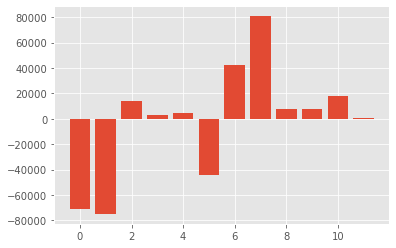

In [71]:
importance_las = lasso.coef_
# summarize feature importance
for i,v in enumerate(importance_las):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_las))], importance_las)
plt.show()

In [72]:
coef_table_l = pd.DataFrame(list(housing.columns)).copy()
coef_table_l.columns = ['Features']
coef_table_l.insert(len(coef_table_l.columns),"Coefs",lasso.coef_.transpose())
coef_table_l

,Features,Coefs
0,longitude,-71298.584643
1,latitude,-74995.106205
2,housing_median_age,14318.849225
3,total_rooms,2825.552309
4,total_bedrooms,4567.482660
5,population,-44554.990649
6,households,42063.467151
7,median_income,80764.298447
8,ocean_proximity,7745.982185
9,rooms_per_household,7653.618583


In [73]:
coef_table_sorted_l=coef_table_l.sort_values(by='Coefs')

<Figure size 432x288 with 0 Axes>

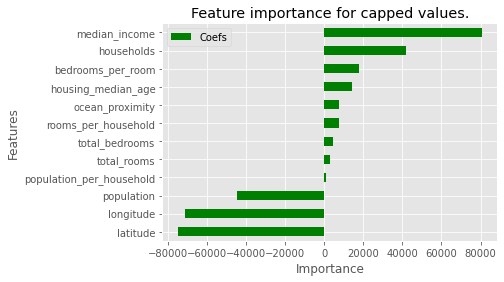

In [74]:
figure()
# Creating a horizontal graph with the values from the pandas Series.

coef_table_sorted_l.plot.barh(x='Features', y='Coefs', color="green")
plt.title("Feature importance for capped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## Elastic Net

Elastic Net first emerged as a result of critique on lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of ridge regression and lasso to get the best of both worlds.

So it is a linear regression with combined L1 and L2 priors as regularizer.

In [75]:
%%time
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=1) #l1_ratio=0.5
en.fit(housing, housing_labels)


Wall time: 24.9 ms


ElasticNet(alpha=1)

In [76]:
%%time
housing_pred_en = en.predict(housing_t)

Wall time: 7.02 ms


There are two parameters that can be optimized: l1_ratio and alpha. Alpha is a constant that multiplies the penalty terms. Defaults to 1.0. See the notes for the exact mathematical meaning of this parameter. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

In [77]:
#Grid Search
clf3 = ElasticNet()
grid_values3 = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], 'l1_ratio': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}
grid_clf_acc3 = GridSearchCV(clf3, param_grid = grid_values3, scoring='neg_mean_squared_error',cv=5)
grid_clf_acc3.fit(housing, housing_labels)

print(grid_clf_acc3.best_estimator_)

#Predict values based on new parameters
y_pred_acc3 = grid_clf_acc3.predict(housing_t)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37507328662.80469, tolerance: 17352830983.432537
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=100, l1_ratio=1)


Checking the RMSE for Elastic Net with alpha=1 and l1_ratio=0.5, it can be seen that the erros is increased for this case compared to baseline Linear Regression, meaning its performing even worse than LinReg.

Moreover, using the optimized parameter alpha=100 and l1_ratio =0.5 (not 1, as found by the gridsearch, otherwise assigning to 1 will run the same model as Lasso previously, that has already been tested). The results of these parameters are even worse, meaning that the model with these parameters is not the optimal for this task.

In [78]:
lin_mse_en = mean_squared_error(housing_labels_t, housing_pred_en)
lin_rmse_en = np.sqrt(lin_mse_en)
lin_rmse_en #l1_ratio=0.5, alpha =1

77862.56542923149

In [79]:
en1 = ElasticNet(alpha=100) #l1_ratio=0.5
en1.fit(housing, housing_labels)
housing_pred_en1 = en1.predict(housing_t)
lin_mse_en1 = mean_squared_error(housing_labels_t, housing_pred_en1)
lin_rmse_en1 = np.sqrt(lin_mse_en1)
lin_rmse_en1 #l1_ratio=0.5

112897.79882029176

Checking the rest of the parameters, it can be observed that the performance of ElasticNet model is siginifcantly lower than the baseline Linear Regression.

In [80]:
lin_mae_en = mean_absolute_error(housing_labels_t, housing_pred_en)
lin_mae_en

58734.0657319621

In [81]:
lin_scores_en = cross_val_score(en, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores_en = np.sqrt(-lin_scores_en)
display_scores(lin_rmse_scores_en)

Scores: [79417.77042832 77564.57475956 79021.72047069 80591.45363685
 79016.97150297 78915.77496464 74894.39653966 78676.81849129
 78350.72362883 79471.62268143]
Mean: 78592.18271042375
Standard deviation: 1439.3338911231692


In [82]:
lr_confidence_en = en.score(housing_t, housing_labels_t)
print("lr confidence: ", lr_confidence_en)

lr confidence:  0.5378042680576369


In [83]:
coef_table_en = pd.DataFrame(list(housing.columns)).copy()
coef_table_en.columns = ['Features']
coef_table_en.insert(len(coef_table_en.columns),"Coefs",en.coef_.transpose())
coef_table_en

,Features,Coefs
0,longitude,-8036.632476
1,latitude,-11198.472654
2,housing_median_age,10680.868315
3,total_rooms,4827.262632
4,total_bedrooms,4409.366038
5,population,-8413.307187
6,households,5766.610066
7,median_income,49574.576410
8,ocean_proximity,21458.948040
9,rooms_per_household,3567.155577


Feature: 0, Score: -8036.63248
Feature: 1, Score: -11198.47265
Feature: 2, Score: 10680.86832
Feature: 3, Score: 4827.26263
Feature: 4, Score: 4409.36604
Feature: 5, Score: -8413.30719
Feature: 6, Score: 5766.61007
Feature: 7, Score: 49574.57641
Feature: 8, Score: 21458.94804
Feature: 9, Score: 3567.15558
Feature: 10, Score: -474.41738
Feature: 11, Score: -1573.35397


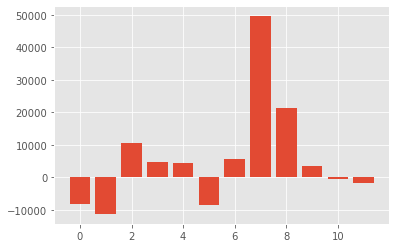

In [84]:
importance_en = en.coef_
# summarize feature importance
for i,v in enumerate(importance_en):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_en))], importance_en)
plt.show()

In [85]:
coef_table_sorted_en=coef_table_en.sort_values(by='Coefs')

<Figure size 432x288 with 0 Axes>

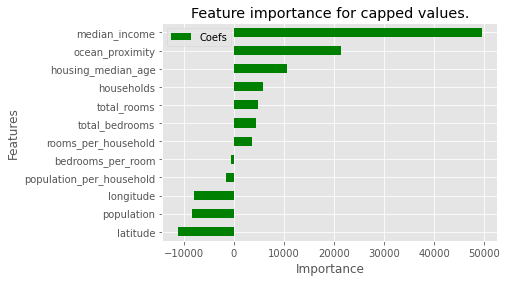

In [86]:
figure()
# Creating a horizontal graph with the values from the pandas Series.

coef_table_sorted_en.plot.barh(x='Features', y='Coefs', color="green")
plt.title("Feature importance for capped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

The changes in features coefficients can be seen in this case. Where all of them had the decreased absolute values. However, as this model performs worse than the baseline Linear Regression, it would not be recommended to use this less reliable model.